# Convolutional Neural Network

### Importing the libraries

In [124]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import pydicom
import glob
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt

In [125]:
cd E:\PCBackup\E\Polygence\PDDataset\

E:\PCBackup\E\Polygence\PDDataset


In [126]:
pwd

'E:\\PCBackup\\E\\Polygence\\PDDataset'

## Part 1 - Data Preprocessing

### Making the Training Set

In [127]:
input_dir = "E:/PCBackup/E/Polygence/PDDataset/PDDataSlices/Slice16/"
out_dir = "E:/PCBackup/E/Polygence/PDDataset/training_set/Positive/"
file_names = [os.path.basename(x) for x in glob.glob(input_dir + './*.jpeg')]

In [128]:
idx1_Pos = []
file_names2 = [os.path.basename(x) for x in glob.glob(out_dir + './*.jpeg')]
for i in range(len(file_names2)):
    os.remove(out_dir + file_names2[i])

for i in range(int(len(file_names) * 0.8)):
    random_num = random.randint(0, int(len(file_names) - 1))
    while random_num in idx1_Pos:
        random_num = random.randint(0, len(file_names) - 1)
    idx1_Pos.append(random_num)
    
for i in idx1_Pos:
    shutil.copy(input_dir + file_names[i], out_dir)

In [129]:
input_dir = "E:/PCBackup/E/Polygence/PDDataset/ControlDataSlices/Slice16/"
out_dir = "E:/PCBackup/E/Polygence/PDDataset/training_set/Negative/"
file_names = [os.path.basename(x) for x in glob.glob(input_dir + './*.jpeg')]

In [130]:
idx1_Neg = []
file_names2 = [os.path.basename(x) for x in glob.glob(out_dir + './*.jpeg')]
for i in range(len(file_names2)):
    os.remove(out_dir + file_names2[i])

for i in range(int(len(file_names) * 0.8)):
    random_num = random.randint(0, int(len(file_names) - 1))
    while random_num in idx1_Neg:
        random_num = random.randint(0, len(file_names) - 1)
    idx1_Neg.append(random_num)
    
for i in idx1_Neg:
    shutil.copy(input_dir + file_names[i], out_dir)

### Preprocessing the Training set

In [131]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = train_datagen.flow_from_directory(
    "training_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 175 images belonging to 2 classes.


### Making the Test Set

In [132]:
input_dir = "E:/PCBackup/E/Polygence/PDDataset/PDDataSlices/Slice16/"
out_dir = "E:/PCBackup/E/Polygence/PDDataset/test_set/Positive/"
file_names = [os.path.basename(x) for x in glob.glob(input_dir + './*.jpeg')]

In [133]:
idx2_Pos = []
file_names2 = [os.path.basename(x) for x in glob.glob(out_dir + './*.jpeg')]
for i in range(len(file_names2)):
    os.remove(out_dir + file_names2[i])

for i in range(int(len(file_names) * 0.2)):
    random_num = random.randint(int(len(file_names) * 0.2), int(len(file_names) - 1))
    while random_num in idx2_Pos or random_num in idx1_Pos:
        random_num = random.randint(0, len(file_names) - 1)
    idx2_Pos.append(random_num)
    
for i in idx2_Pos:
    shutil.copy(input_dir + file_names[i], out_dir)

In [134]:
input_dir = "E:/PCBackup/E/Polygence/PDDataset/ControlDataSlices/Slice16/"
out_dir = "E:/PCBackup/E/Polygence/PDDataset/test_set/Negative/"
file_names = [os.path.basename(x) for x in glob.glob(input_dir + './*.jpeg')]

In [135]:
idx2_Neg = []
file_names2 = [os.path.basename(x) for x in glob.glob(out_dir + './*.jpeg')]
for i in range(len(file_names2)):
    os.remove(out_dir + file_names2[i])

for i in range(int(len(file_names) * 0.2)):
    random_num = random.randint(int(len(file_names) * 0.2), int(len(file_names) - 1))
    while random_num in idx2_Neg or random_num in idx1_Neg:
        random_num = random.randint(0, len(file_names) - 1)
    idx2_Neg.append(random_num)
    
for i in idx2_Neg:
    shutil.copy(input_dir + file_names[i], out_dir)

### Preprocessing the Test set

In [136]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

type(test_set)

Found 43 images belonging to 2 classes.


tensorflow.python.keras.preprocessing.image.DirectoryIterator

## Part 2 - Building the CNN

### Initializing the CNN

In [137]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [138]:
cnn.add(tf.keras.layers.Conv2D(filters=32,  kernel_size=3, activation="relu", input_shape=(64, 64, 3)))

### Step 2 - Pooling

In [139]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [140]:
cnn.add(tf.keras.layers.Conv2D(filters=32,  kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [141]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [142]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [143]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [144]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [145]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 155, shuffle = True)
# Graph epoch accuracy to find max

Epoch 1/155
6/6 [==============================] - 1s 145ms/step - loss: 0.6838 - accuracy: 0.5886 - val_loss: 0.6389 - val_accuracy: 0.6279
Epoch 2/155
6/6 [==============================] - 0s 64ms/step - loss: 0.6496 - accuracy: 0.6400 - val_loss: 0.6155 - val_accuracy: 0.6279
Epoch 3/155
6/6 [==============================] - 0s 65ms/step - loss: 0.6581 - accuracy: 0.6400 - val_loss: 0.5871 - val_accuracy: 0.7442
Epoch 4/155
6/6 [==============================] - 0s 66ms/step - loss: 0.6120 - accuracy: 0.6743 - val_loss: 0.5587 - val_accuracy: 0.7442
Epoch 5/155
6/6 [==============================] - 0s 64ms/step - loss: 0.6108 - accuracy: 0.6800 - val_loss: 0.5234 - val_accuracy: 0.7209
Epoch 6/155
6/6 [==============================] - 0s 66ms/step - loss: 0.6195 - accuracy: 0.6686 - val_loss: 0.5125 - val_accuracy: 0.7442
Epoch 7/155
6/6 [==============================] - 0s 64ms/step - loss: 0.5955 - accuracy: 0.6629 - val_loss: 0.5507 - val_accuracy: 0.8140
Epoch 8/155
6/6 [==

6/6 [==============================] - 0s 63ms/step - loss: 0.1035 - accuracy: 0.9714 - val_loss: 0.1696 - val_accuracy: 0.9767
Epoch 60/155
6/6 [==============================] - 0s 64ms/step - loss: 0.0895 - accuracy: 0.9771 - val_loss: 0.1164 - val_accuracy: 0.9767
Epoch 61/155
6/6 [==============================] - 0s 63ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.1843 - val_accuracy: 0.9767
Epoch 62/155
6/6 [==============================] - 0s 64ms/step - loss: 0.0860 - accuracy: 0.9771 - val_loss: 0.2339 - val_accuracy: 0.9535
Epoch 63/155
6/6 [==============================] - 0s 61ms/step - loss: 0.0689 - accuracy: 0.9771 - val_loss: 0.1670 - val_accuracy: 0.9535
Epoch 64/155
6/6 [==============================] - 0s 64ms/step - loss: 0.0743 - accuracy: 0.9829 - val_loss: 0.0707 - val_accuracy: 0.9535
Epoch 65/155
6/6 [==============================] - 0s 62ms/step - loss: 0.0698 - accuracy: 0.9771 - val_loss: 0.1658 - val_accuracy: 0.9535
Epoch 66/155
6/6 [========

6/6 [==============================] - 0s 65ms/step - loss: 0.0325 - accuracy: 0.9886 - val_loss: 0.4920 - val_accuracy: 0.9767
Epoch 118/155
6/6 [==============================] - 0s 61ms/step - loss: 0.0237 - accuracy: 0.9943 - val_loss: 0.6475 - val_accuracy: 0.9535
Epoch 119/155
6/6 [==============================] - 0s 62ms/step - loss: 0.0286 - accuracy: 0.9943 - val_loss: 0.4880 - val_accuracy: 0.9535
Epoch 120/155
6/6 [==============================] - 0s 68ms/step - loss: 0.0239 - accuracy: 0.9943 - val_loss: 0.6702 - val_accuracy: 0.9302
Epoch 121/155
6/6 [==============================] - 0s 64ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.5576 - val_accuracy: 0.9767
Epoch 122/155
6/6 [==============================] - 0s 72ms/step - loss: 0.0481 - accuracy: 0.9886 - val_loss: 0.8491 - val_accuracy: 0.9302
Epoch 123/155
6/6 [==============================] - 0s 64ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.5717 - val_accuracy: 0.9767
Epoch 124/155
6/6 [=

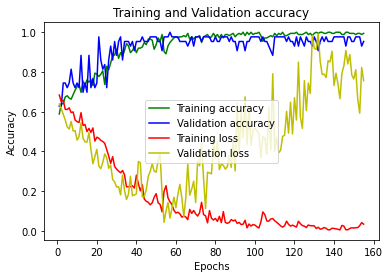

In [146]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,156)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.plot(epochs, loss_train, 'r', label="Training loss")
plt.plot(epochs, loss_val, 'y', label="Validation loss")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [147]:
cnn.evaluate(test_set)

2/2 [==============================] - 0s 6ms/step - loss: 0.7560 - accuracy: 0.9535


[0.755993127822876, 0.9534883499145508]

## Part 4 - Making a single prediction

In [25]:
test_image = image.load_img('E:\PCBackup\E\Polygence\Control.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.5:
    prediction = "Negative"
else:
    prediction = "Postive"

In [26]:
print(prediction)

Negative


In [27]:
test_image = image.load_img('E:\PCBackup\E\Polygence\ControlData\PPMI_102366_MR_LOWER_2D_GRE_MT__br_raw_20210929001748134_2_S1067382_I1497683.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.5:
    prediction = "Negative"
else:
    prediction = "Positive"

In [ ]:
print(prediction)

In [100]:
test_image = image.load_img('E:\PCBackup\E\Polygence\ControlData\PPMI_101195_MR_2D_GRE-MT__br_raw_20210924164712529_2_S1066283_I1496365.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.5:
    prediction = "Negative"
else:
    prediction = "Positive"

In [101]:
print(prediction)

Negative


In [102]:
test_image = image.load_img('E:\PCBackup\E\Polygence\PDData\PPMI_100018_MR_2D_GRE-MT__br_raw_20210928204101945_2_S1067280_I1497581.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.5:
    prediction = "Negative"
else:
    prediction = "Positive"

In [103]:
print(prediction)

Positive


In [104]:
test_image = image.load_img('E:\PCBackup\E\Polygence\PDData\PPMI_100001_MR_AX_T2_GRE_MT_br_raw_20210723155004342_2_S1047633_I1473181.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.5:
    prediction = "Negative"
else:
    prediction = "Positive"

In [105]:
print(prediction)

Positive
